
---

**กำหนดจำนวนคลัสเตอร์เป็น 10 คลัสเตอร์**


---

ใช้ K-Means จำแนก Cluster โดยเราไม่รู้ว่ามีกี่ชนิดจึงสมมติให้เป็น 10




> **นำเข้าข้อมูลสำหรับสร้างโมเดล ( datasets )** ใช้ฟังก์ชัน make_blobs สำหรับการสร้างชุดข้อมูลกระจายเป็นกระจุก



*   n_samples คือ จำนวนข้อมูล
*   n_features คือ จำนวนมิติของตัวแปรต้น
*   centers คือ จำนวนกลุ่มก้อน
*   cluster_std คือ ส่วนเบี่ยงเบนมาตรฐานของการกระจาย





In [ ]:
import numpy as np
from sklearn import datasets

np.random.seed(10)
X,z = datasets.make_blobs(n_samples=1000,n_features=2,centers=5,cluster_std=2)



> **เทรนโมเดล** โดยใช้ k-means กับตัวแปร x 
กำหนด n_cluster = 10





In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10)
km.fit(X)
z = km.predict(X)



> **สร้างกราฟ 2 มิติ แสดงผลการจัดกลุ่มข้อมูล**

*   aspect คือ สัดส่วนระหว่างแกน y และ x
*   c คือ ลิตส์สีของจุด
*   edgecolor คือ สีขอบของจุด
*   cmap คือ โทนสีของกราฟ




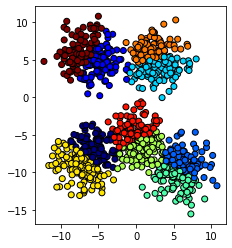

In [ ]:
import matplotlib.pyplot as plt

plt.gca(aspect=1).scatter(X[:,0],X[:,1],c=z,edgecolor='k',cmap='jet')
plt.show()



---
**กำหนดจำนวนคลัสเตอร์เป็น 3 คลัสเตอร์**


---






> **นำเข้าข้อมูลสำหรับสร้างโมเดล ( datasets )**
สามารถปรับค่าต่าง ๆ ในวงเล็บได้



In [ ]:
np.random.seed(26)
X,z = datasets.make_blobs(n_samples=1000,n_features=2,centers=3,cluster_std=2.1)



> **เทรนโมเดล** โดยกำหนด n_cluster = 3









In [ ]:
km = KMeans(n_clusters=3)
km.fit(X)
z = km.fit_predict(X)

> **สร้างกราฟ 2 มิติ แสดงผลการจัดกลุ่มข้อมูล**

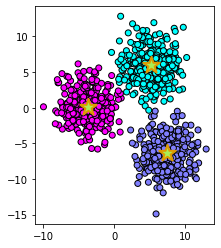

In [ ]:
plt.gca(aspect=1)
plt.scatter(X[:,0],X[:,1],c=z,edgecolor='k',cmap='cool')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],300,'#AAEE55',marker='*',edgecolor='#DD9900',lw=2)
plt.show()



---


**การเพิ่มลดมิติของข้อมูล**

---
เราจะใช้คำสั่ง .transform หาระยะห่างระว่างข้อมูลกับจุด centroid เพื่อคำนวณพิกัดใหม่


In [ ]:
X2 = km.transform(X)



> **สร้างกราฟ 3 มิติ แสดงการจัดกลุ่มของข้อมูล**


*   ตัวภาพทั้งหมดก็คือ figure ส่วนพื้นขาวๆและเส้นแกนสีดำคือส่วนของ axes และเส้นกราฟที่เห็นทั้ง ๒ สีนี้คือส่วนของเส้นกราฟที่วาดลงบน axes
*   figure คือ ตัวภาพทั้งหมด
*   axes คือ พื้นที่สีขาวและเส้นแกนสีดำ





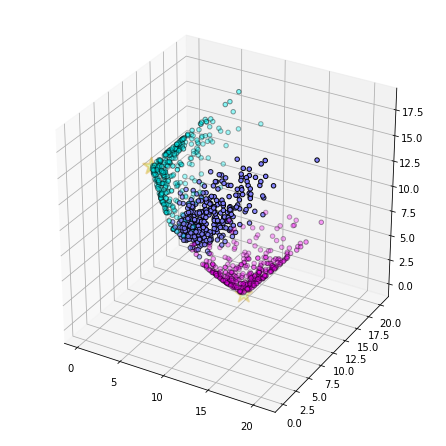

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=[6,6])
ax = plt.axes([0,0,1,1],projection='3d')
ax.scatter(X2[:,0],X2[:,1],X2[:,2],c=z,edgecolor='k',cmap='cool')
cen = km.transform(km.cluster_centers_)
ax.scatter(cen[:,0],cen[:,1],cen[:,2],s=300,c='#AAEE55',marker='*',edgecolor='#DD9900',lw=2)
plt.show()